In [13]:
!pip install jedi

In [14]:
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import sys
import matplotlib.pyplot as plt
from jedi.api.refactoring import inline

#from sklearn.datasets import load_boston


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder




In [17]:
encabezados = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [18]:

df = pd.DataFrame(data, columns=encabezados)
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   ptratio       b  lstat  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


[[ 4.98]
 [ 9.14]
 [ 4.03]
 [ 2.94]
 [ 5.33]
 [ 5.21]
 [12.43]
 [19.15]
 [29.93]
 [17.1 ]
 [20.45]
 [13.27]
 [15.71]
 [ 8.26]
 [10.26]
 [ 8.47]
 [ 6.58]
 [14.67]
 [11.69]
 [11.28]
 [21.02]
 [13.83]
 [18.72]
 [19.88]
 [16.3 ]
 [16.51]
 [14.81]
 [17.28]
 [12.8 ]
 [11.98]
 [22.6 ]
 [13.04]
 [27.71]
 [18.35]
 [20.34]
 [ 9.68]
 [11.41]
 [ 8.77]
 [10.13]
 [ 4.32]
 [ 1.98]
 [ 4.84]
 [ 5.81]
 [ 7.44]
 [ 9.55]
 [10.21]
 [14.15]
 [18.8 ]
 [30.81]
 [16.2 ]
 [13.45]
 [ 9.43]
 [ 5.28]
 [ 8.43]
 [14.8 ]
 [ 4.81]
 [ 5.77]
 [ 3.95]
 [ 6.86]
 [ 9.22]
 [13.15]
 [14.44]
 [ 6.73]
 [ 9.5 ]
 [ 8.05]
 [ 4.67]
 [10.24]
 [ 8.1 ]
 [13.09]
 [ 8.79]
 [ 6.72]
 [ 9.88]
 [ 5.52]
 [ 7.54]
 [ 6.78]
 [ 8.94]
 [11.97]
 [10.27]
 [12.34]
 [ 9.1 ]
 [ 5.29]
 [ 7.22]
 [ 6.72]
 [ 7.51]
 [ 9.62]
 [ 6.53]
 [12.86]
 [ 8.44]
 [ 5.5 ]
 [ 5.7 ]
 [ 8.81]
 [ 8.2 ]
 [ 8.16]
 [ 6.21]
 [10.59]
 [ 6.65]
 [11.34]
 [ 4.21]
 [ 3.57]
 [ 6.19]
 [ 9.42]
 [ 7.67]
 [10.63]
 [13.44]
 [12.33]
 [16.47]
 [18.66]
 [14.09]
 [12.27]
 [15.55]
 [13.  ]
 

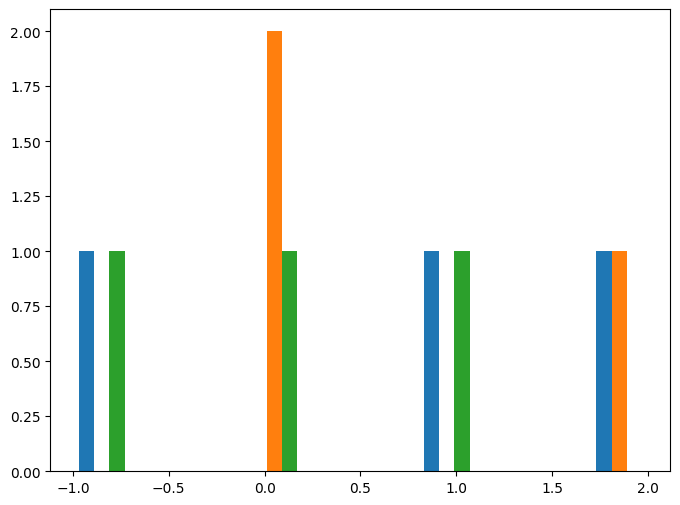

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
[0. 0. 0.]
[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
[[-1.5         0.          0.33333333]
 [ 1.          1.25        1.66666667]]
[[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]]
[[-0.5 -0.5  1. ]
 [ 0.   0.5 -0.3]]
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]
Normalizer()
Binarizer()
Binarizer(threshold=-0.5)
country to code mapping: 

australia 	 0
hong kong 	 1
new zealand 	 2
singapore 	 3
[1 3 0 2]
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
['australia']
['hong kong']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:

# ----------------------La idea de Prepocesamiento de datos es disminuir los errores del modelo a su mínima expresión

# Árboles de decisión: También pueden ser utilizados como regresión cuando nuestros datos son muy complejos

X = df[['lstat']].values
#y = df[['medv']].values
y = target
print(X)

'''

alpha = 0.0001
w_ = np.zeros(1 + X.shape[1])
cost_ = []
n_ = 100

# Sin preprocesamiento
for i in range(n_):
    y_pred = np.dot(X, w_[1:]) + w_[0]   # w_ empieza en posición 1 y termina hasta el fin del arreglo a[1:5] dos puntos provienen del rango
    errors = (y - y_pred)

    w_[1:] += alpha + X.T.dot(errors)
    w_[0] += alpha + errors.sum()

    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_ + 1), cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

# -----------------------------------------------------------Con preprocesamiento ------------------------------------------------------------
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]   # w_ empieza en posición 1 y termina hasta el fin del arreglo a[1:5] dos puntos provienen del rango
    errors = (y - y_pred)

    w_[1:] += alpha + X_std.T.dot(errors)
    w_[0] += alpha + errors.sum()

    cost = (errors**2).sum() / 2
    cost_.append(cost)

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_ + 1), cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()



# Comparación
plt.figure(figsize=(8, 6))
plt.hist(X)
plt.xlim(-40, 40)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(X_std)
plt.xlim(-4, 4)
plt.show()

'''
# ---------------------------------2. Formas para procesar los datos: que la suma de los errores sea cero. media cero y varianza constante entre cero y uno
# a) Estandarización de los datos. Remover la media
# b) Min- Max o características de escala.
# c) Normalización de los datos
# d) Binarización

# a) Fórmula de Distribución normal    x = (x - xmedia) / desv_std

X_train = [[1., -1., 2.], [2., 0., 0], [0., 1., -1.]]


scaler = preprocessing.StandardScaler().fit(X_train)
print(scaler)

scaler.mean_

scaler.scale_

scaler.transform(X_train)
plt.figure(figsize=(8, 6))
plt.hist(X_train)
plt.show()

X_test = [[-1, 1, 0]]
scaler.transform(X_test)



X_scaled = preprocessing.scale(X_train) #Datos a escala tienen media cero y varianza entre uno y cero. Se distribuye de manera normal
print(X_scaled)
x_scaled_mean = X_scaled.mean(axis=0)
print(x_scaled_mean)


# b) Min Max Scaler
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(X_train_minmax)

X_test = np.array([[-3, -1, 0], [2, 1.5, 4]])
X_test_minmax = min_max_scaler.transform(X_test)
print(X_test_minmax)

# c) MaxAbsScaler
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
print(X_train_maxabs)

X_test = np.array([[-1, -0.5, 2], [0, 0.5, -0.6]])
X_test_maxabs = max_abs_scaler.transform(X_test)
print(X_test_maxabs)

# d) Whitening vs scaling (Componentes Principales)
X = [[1., -1., 2.], [2., 0., 0], [0., 1., -1.]]


X_normalized = preprocessing.normalize(X, norm='l2')    # l1 = Least absolute deviations , l2 = Least Squares
print(X_normalized)

# Otra forma de normalizar

normalizer = preprocessing.Normalizer().fit(X)
print(normalizer)

normalizer.transform(X)
normalizer.transform([[-1., 1., 0.]])

binarizer = preprocessing.Binarizer().fit(X)
print(binarizer)
binarizer.transform(X)

binarizer = preprocessing.Binarizer(threshold=-0.5)
print(binarizer)
binarizer.transform(X)


#  e) Encoding categorical features
source = ['australia', 'singapore', 'new zealand', 'hong kong']
label_enc = preprocessing.LabelEncoder()
src = label_enc.fit_transform(source)

print('country to code mapping: \n')

for k, v in enumerate(label_enc.classes_):
    print(v, '\t', k)

test_data = ['hong kong', 'singapore', 'australia', 'new zealand']

result = label_enc.transform(test_data)
print(result)


# ----------- f) OneHotEncoder
#Util para utilizar en sparse matrix
# utiliza un esquema k one-of-k-scheme

one_hot_enc = OneHotEncoder(sparse=False, categories='auto')
src = src.reshape(len(src), 1)
one_hot = one_hot_enc.fit_transform(src)
print(one_hot)

invert_res = label_enc.inverse_transform([np.argmax(one_hot[0, :])])
print(invert_res)

invert_res = label_enc.inverse_transform([np.argmax(one_hot[3, :])])
print(invert_res)